##📒 Fuel Price Optimization — EDA (Exploratory Data Analysis)

In [11]:
#Step 1 — Import Libraries & Load Dataset

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set default chart size
plt.rcParams["figure.figsize"] = (9,5)

# Load dataset (upload in Colab first)
file_path = "oil_retail_history.csv"
df = pd.read_csv(file_path, parse_dates=["date"])

# Sort by date to maintain time order
df = df.sort_values("date")

# Preview first few rows
df.head()


,date,price,cost,comp1_price,comp2_price,comp3_price,volume
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332


In [12]:
# Step 2 — Basic Dataset Summary

# Print dataset size and coverage period
print("Rows:", len(df))
print("Date Range:", df["date"].min().date(), "to", df["date"].max().date())

# Check missing values
print("\nMissing Values:\n", df.isna().sum())

# Display descriptive statistics for numeric columns
print("\nDescriptive Stats:\n")
display(df.describe())


Rows: 730
Date Range: 2023-01-01 to 2024-12-30

Missing Values:
 date           0
price          0
cost           0
comp1_price    0
comp2_price    0
comp3_price    0
volume         0
dtype: int64

Descriptive Stats:



,date,price,cost,comp1_price,comp2_price,comp3_price,volume
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2023-12-31 12:00:00,96.505301,86.498178,96.551658,96.530068,96.457260,13960.983562
min,2023-01-01 00:00:00,88.080000,83.340000,88.320000,87.070000,86.080000,11397.000000
25%,2023-07-02 06:00:00,94.670000,85.302500,94.555000,94.827500,94.712500,13326.250000
50%,2023-12-31 12:00:00,96.525000,86.255000,96.590000,96.430000,96.515000,13882.000000
75%,2024-06-30 18:00:00,98.420000,87.610000,98.467500,98.447500,98.097500,14538.750000
max,2024-12-30 00:00:00,104.890000,91.860000,104.200000,105.000000,104.360000,16890.000000
std,NaN,2.747598,1.575689,2.779654,2.796763,2.782295,905.912360


In [13]:
#Step 3 — Create Derived Columns For Analysis

# Margin per liter = price - cost
df["margin"] = df["price"] - df["cost"]

# Profit = margin × volume
df["profit"] = df["margin"] * df["volume"]

# Average competitor price
df["comp_avg"] = df[["comp1_price","comp2_price","comp3_price"]].mean(axis=1)

# Time-based features for seasonality analysis
df["dayofweek"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month


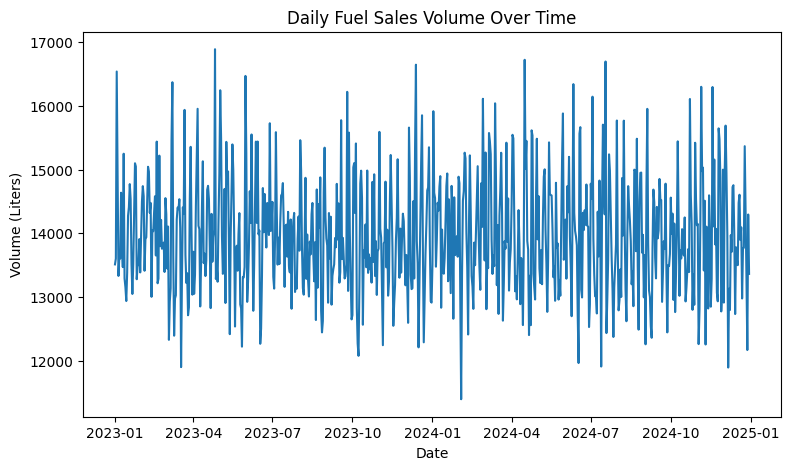

In [14]:
#Step 4 — Volume Trend Over Time

# Shows demand fluctuations across the 2-year period
plt.plot(df["date"], df["volume"])
plt.xlabel("Date")
plt.ylabel("Volume (Liters)")
plt.title("Daily Fuel Sales Volume Over Time")
plt.show()

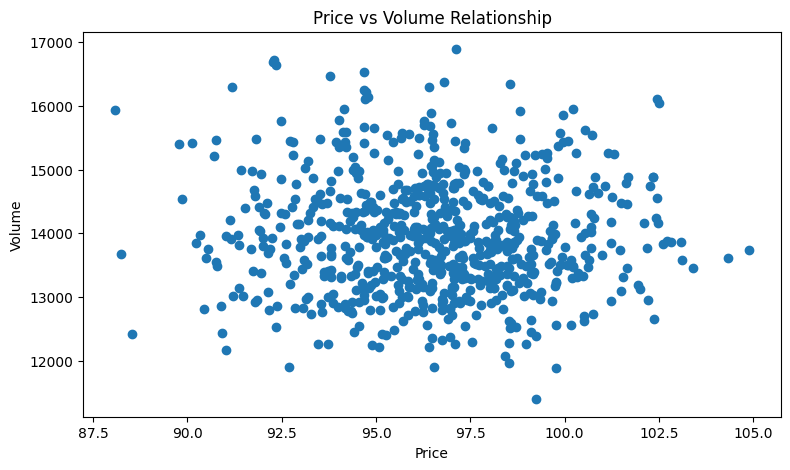

In [15]:
# Step 5 — Price vs Volume Relationship

# Helps understand whether demand drops when price increases
plt.scatter(df["price"], df["volume"])
plt.xlabel("Price")
plt.ylabel("Volume")
plt.title("Price vs Volume Relationship")
plt.show()

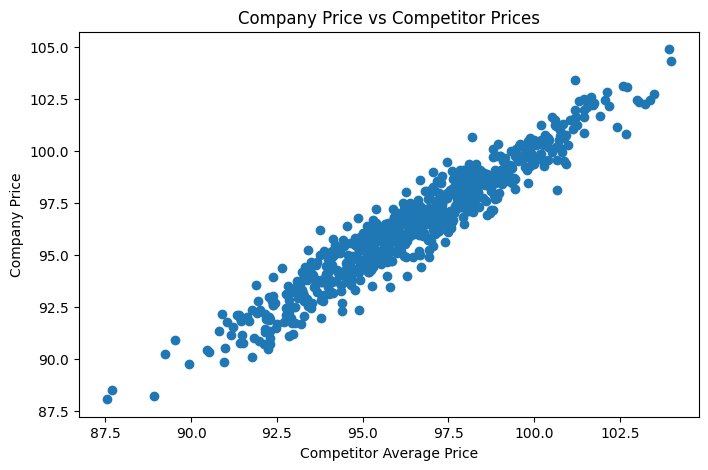

In [7]:
# STEP 6 — Plot: Company Price vs Competitor Avg Price

df["comp_avg"] = df[["comp1_price","comp2_price","comp3_price"]].mean(axis=1)

plt.scatter(df["comp_avg"], df["price"])
plt.xlabel("Competitor Average Price")
plt.ylabel("Company Price")
plt.title("Company Price vs Competitor Prices")
plt.show()

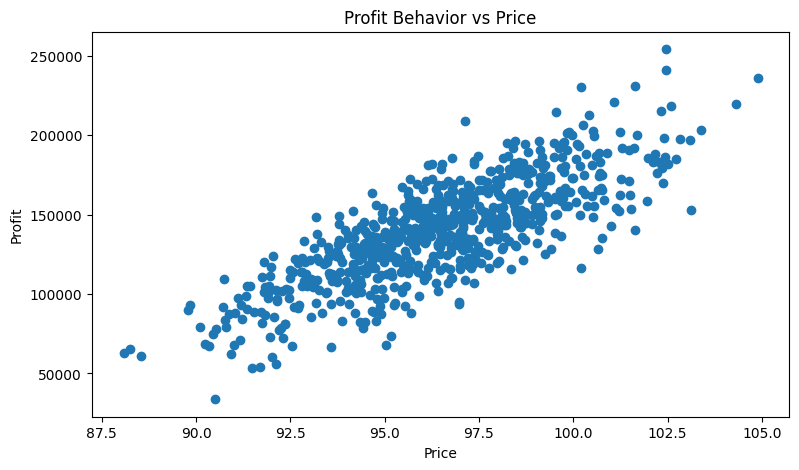

In [16]:
# Step 7 — Profit vs Price Behavior

# Helps understand whether higher price always means higher profit
plt.scatter(df["price"], df["profit"])
plt.xlabel("Price")
plt.ylabel("Profit")
plt.title("Profit Behavior vs Price")
plt.show()

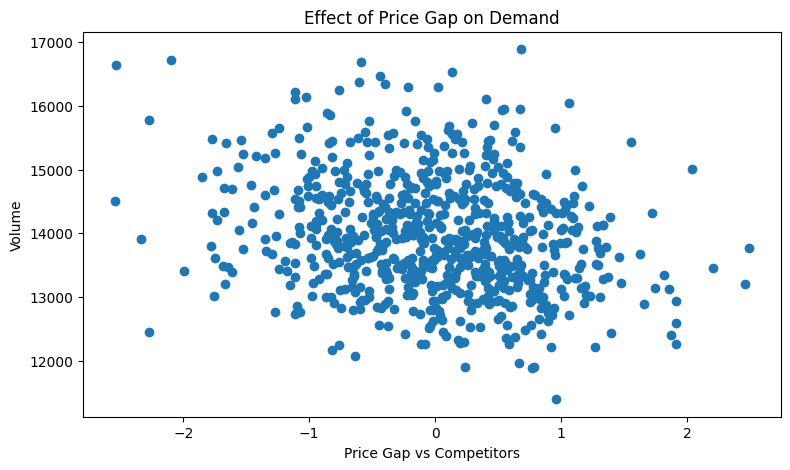

In [17]:
# Step 8 — Price Gap vs Volume (Competitiveness Effect)

# Difference between our price and market price
df["price_gap"] = df["price"] - df["comp_avg"]

# Shows how demand reacts when we are cheaper or costlier than competitors
plt.scatter(df["price_gap"], df["volume"])
plt.xlabel("Price Gap vs Competitors")
plt.ylabel("Volume")
plt.title("Effect of Price Gap on Demand")
plt.show()

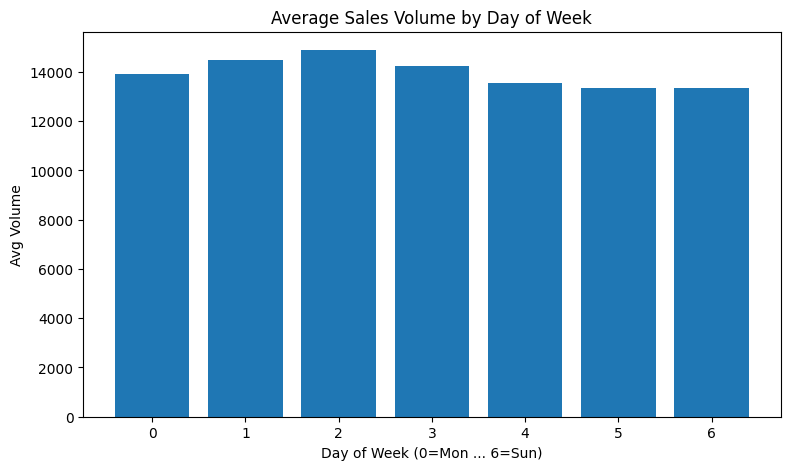

In [18]:
# Step 9 — Weekday vs Weekend Demand

# Average volume by day of week (0 = Monday, 6 = Sunday)
vol_by_day = df.groupby("dayofweek")["volume"].mean()

plt.bar(vol_by_day.index, vol_by_day.values)
plt.xlabel("Day of Week (0=Mon ... 6=Sun)")
plt.ylabel("Avg Volume")
plt.title("Average Sales Volume by Day of Week")
plt.show()

In [19]:
# Step 10 — Correlation Matrix (Feature Insight)

# Helps identify which variables influence demand and profit
corr = df[[
    "price","comp_avg","margin","volume","profit","price_gap"
]].corr()

corr

,price,comp_avg,margin,volume,profit,price_gap
price,1.000000,0.958078,0.819223,-0.040660,0.793021,0.250109
comp_avg,0.958078,1.000000,0.744638,0.027075,0.738396,-0.037776
margin,0.819223,0.744638,1.000000,-0.072649,0.959111,0.340888
volume,-0.040660,0.027075,-0.072649,1.000000,0.204243,-0.233312
profit,0.793021,0.738396,0.959111,0.204243,1.000000,0.270593
price_gap,0.250109,-0.037776,0.340888,-0.233312,0.270593,1.000000


In [20]:
# EDA Summary (Useful for Report)

summary = {
    "rows": len(df),
    "date_range": f"{df.date.min().date()} → {df.date.max().date()}",
    "avg_price": round(df.price.mean(),2),
    "avg_volume": round(df.volume.mean(),2),
    "avg_margin": round(df.margin.mean(),2),
    "avg_profit": round(df.profit.mean(),2),
}

summary

{'rows': 730,
 'date_range': '2023-01-01 → 2024-12-30',
 'avg_price': np.float64(96.51),
 'avg_volume': np.float64(13960.98),
 'avg_margin': np.float64(10.01),
 'avg_profit': np.float64(139561.76)}

##📒 Fuel Price Optimization — Data Pipeline

In [21]:
# Step 1 — Imports & Load Raw Data
import pandas as pd
import numpy as np

file_path = "oil_retail_history.csv"  # upload file first
raw_df = pd.read_csv(file_path, parse_dates=["date"])

# Ensure time order
raw_df = raw_df.sort_values("date")
raw_df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332


In [22]:
#Step 2 — Data Validation & Cleaning
df = raw_df.copy()

# Remove duplicate records (if any)
df = df.drop_duplicates(subset=["date"])

# Drop rows with missing critical fields
required_cols = ["price","cost","comp1_price","comp2_price","comp3_price","volume"]
df = df.dropna(subset=required_cols)

# Ensure price ≥ cost (invalid economics)
df = df[df["price"] >= df["cost"]]

# Remove extreme outliers (3σ rule for volume)
vol_mean, vol_std = df["volume"].mean(), df["volume"].std()
df = df[(df["volume"] > vol_mean - 3*vol_std) &
        (df["volume"] < vol_mean + 3*vol_std)]

print("Final cleaned rows:", len(df))
df.head()

Final cleaned rows: 727


,date,price,cost,comp1_price,comp2_price,comp3_price,volume
0,2023-01-01,97.66,86.46,98.39,99.10,97.37,13513
1,2023-01-02,96.46,87.25,95.37,96.25,97.38,13605
2,2023-01-03,94.67,86.40,94.41,94.69,94.50,16540
3,2023-01-04,97.32,87.51,99.12,96.90,97.54,14927
4,2023-01-05,94.08,86.38,93.31,94.61,93.85,13332


In [23]:
# Step 3 — Feature Engineering

# --- Competitor features ---
df["comp_avg"] = df[["comp1_price","comp2_price","comp3_price"]].mean(axis=1)
df["price_gap"] = df["price"] - df["comp_avg"]   # competitiveness difference

# --- Margin & profitability ---
df["margin"] = df["price"] - df["cost"]

# --- Lag features (yesterday history) ---
df["lag_price"] = df["price"].shift(1)
df["lag_volume"] = df["volume"].shift(1)

# --- Rolling / trend features ---
df["ma7_price"] = df["price"].rolling(7).mean()
df["ma7_volume"] = df["volume"].rolling(7).mean()

# --- Seasonality features ---
df["dayofweek"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month

# Drop first few rows with missing lag/rolling
df = df.dropna()

df.head()

,date,price,cost,comp1_price,comp2_price,comp3_price,volume,comp_avg,price_gap,margin,lag_price,lag_volume,ma7_price,ma7_volume,dayofweek,month
6,2023-01-07,98.63,87.79,98.31,99.22,99.34,13603,98.956667,-0.326667,10.84,96.73,13643.0,96.507143,14166.142857,5,1
7,2023-01-08,100.89,88.00,101.76,101.22,101.35,14638,101.443333,-0.553333,12.89,98.63,13603.0,96.968571,14326.857143,6,1
8,2023-01-09,97.71,88.68,99.49,99.68,97.38,13867,98.850000,-1.140000,9.03,100.89,14638.0,97.147143,14364.285714,0,1
9,2023-01-10,97.14,89.05,96.02,98.24,96.82,13471,97.026667,0.113333,8.09,97.71,13867.0,97.500000,13925.857143,1,1
10,2023-01-11,101.30,88.72,100.10,100.59,101.82,15250,100.836667,0.463333,12.58,97.14,13471.0,98.068571,13972.000000,2,1


In [24]:
# Step 4 — Define Final Training Feature Set

feature_cols = [
    "price","cost","margin",
    "comp1_price","comp2_price","comp3_price","comp_avg","price_gap",
    "lag_price","lag_volume","ma7_price","ma7_volume",
    "dayofweek","month"
]

target_col = "volume"   # model predicts demand (liters)

processed_df = df[["date"] + feature_cols + [target_col]].copy()
processed_df.head()

,date,price,cost,margin,comp1_price,comp2_price,comp3_price,comp_avg,price_gap,lag_price,lag_volume,ma7_price,ma7_volume,dayofweek,month,volume
6,2023-01-07,98.63,87.79,10.84,98.31,99.22,99.34,98.956667,-0.326667,96.73,13643.0,96.507143,14166.142857,5,1,13603
7,2023-01-08,100.89,88.00,12.89,101.76,101.22,101.35,101.443333,-0.553333,98.63,13603.0,96.968571,14326.857143,6,1,14638
8,2023-01-09,97.71,88.68,9.03,99.49,99.68,97.38,98.850000,-1.140000,100.89,14638.0,97.147143,14364.285714,0,1,13867
9,2023-01-10,97.14,89.05,8.09,96.02,98.24,96.82,97.026667,0.113333,97.71,13867.0,97.500000,13925.857143,1,1,13471
10,2023-01-11,101.30,88.72,12.58,100.10,100.59,101.82,100.836667,0.463333,97.14,13471.0,98.068571,13972.000000,2,1,15250


In [25]:
# Step 5 — Save Processed Dataset for Model Training

processed_df.to_csv("processed_training_data.csv", index=False)
print("Saved -> processed_training_data.csv")

Saved -> processed_training_data.csv


In [26]:
# Pipeline Behavior Summary
summary = {
    "original_rows": len(raw_df),
    "cleaned_rows": len(processed_df),
    "num_features": len(feature_cols),
    "feature_columns": feature_cols
}

summary

{'original_rows': 730,
 'cleaned_rows': 721,
 'num_features': 14,
 'feature_columns': ['price',
  'cost',
  'margin',
  'comp1_price',
  'comp2_price',
  'comp3_price',
  'comp_avg',
  'price_gap',
  'lag_price',
  'lag_volume',
  'ma7_price',
  'ma7_volume',
  'dayofweek',
  'month']}

##📒 Fuel Price Optimization —Model Training

In [27]:
#Step-1 — Import Libraries & Load Processed Data

# Import required libraries for ML and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # used to save the trained model

# Load the processed dataset generated in Step-2
df = pd.read_csv("processed_training_data.csv", parse_dates=["date"])

# Quick preview of the training dataset
df.head()

,date,price,cost,margin,comp1_price,comp2_price,comp3_price,comp_avg,price_gap,lag_price,lag_volume,ma7_price,ma7_volume,dayofweek,month,volume
0,2023-01-07,98.63,87.79,10.84,98.31,99.22,99.34,98.956667,-0.326667,96.73,13643.0,96.507143,14166.142857,5,1,13603
1,2023-01-08,100.89,88.00,12.89,101.76,101.22,101.35,101.443333,-0.553333,98.63,13603.0,96.968571,14326.857143,6,1,14638
2,2023-01-09,97.71,88.68,9.03,99.49,99.68,97.38,98.850000,-1.140000,100.89,14638.0,97.147143,14364.285714,0,1,13867
3,2023-01-10,97.14,89.05,8.09,96.02,98.24,96.82,97.026667,0.113333,97.71,13867.0,97.500000,13925.857143,1,1,13471
4,2023-01-11,101.30,88.72,12.58,100.10,100.59,101.82,100.836667,0.463333,97.14,13471.0,98.068571,13972.000000,2,1,15250


In [28]:
# Step-2 — Select Features & Target

# List of features that the model will use for prediction
feature_cols = [
    "price","cost","margin",
    "comp1_price","comp2_price","comp3_price","comp_avg","price_gap",
    "lag_price","lag_volume","ma7_price","ma7_volume",
    "dayofweek","month"
]

# Target variable → we want to predict daily fuel demand (volume)
target_col = "volume"

# Separate features (X) and target (y)
X = df[feature_cols]
y = df[target_col]

In [29]:
# Step-3 — Train / Test Split (Time-Aware)

# Instead of random splitting, we split based on time
# First 80% → training (past data)
# Last 20% → testing (future-like data simulation)

split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Training rows :", len(X_train))
print("Testing rows  :", len(X_test))

Training rows : 576
Testing rows  : 145


In [30]:
# Step-4 — Train Random Forest Regression Model

# Initialize Random Forest model
# n_estimators = number of trees
# max_depth = controls model complexity (prevents overfitting)
# n_jobs = use all CPU cores for faster training

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

# Fit model on training dataset
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


In [32]:
# Step-5 — Evaluate Model Performance

# Predict volume on test (future) data
y_pred = model.predict(X_test)

# Calculate key regression metrics
mae = mean_absolute_error(y_test, y_pred)  # average error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # penalizes large errors
r2 = r2_score(y_test, y_pred) # goodness of fit

print("Model Evaluation Results:")
print("MAE  :", round(mae,2))
print("RMSE :", round(rmse,2))
print("R²   :", round(r2,3))

Model Evaluation Results:
MAE  : 526.76
RMSE : 701.82
R²   : 0.41


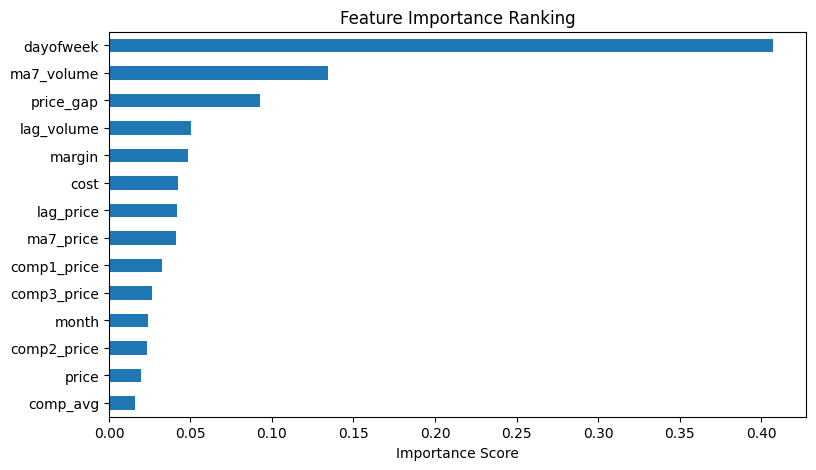

In [33]:
#Step-6 — Feature Importance (Explainability)

# Shows which features influence the prediction the most
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=feature_cols)

# Sort from least to most important
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance Ranking")
plt.xlabel("Importance Score")
plt.show()

In [34]:
# Step 7 — Save Trained Model

joblib.dump(model, "demand_model.pkl")
print("Saved -> demand_model.pkl")

Saved -> demand_model.pkl


In [35]:
# Summary
summary = {
    "train_rows": len(X_train),
    "test_rows": len(X_test),
    "mae": round(mae,2),
    "rmse": round(rmse,2),
    "r2": round(r2,3),
    "top_features": list(importances.sort_values(ascending=False).head(5).index)
}

summary

{'train_rows': 576,
 'test_rows': 145,
 'mae': 526.76,
 'rmse': np.float64(701.82),
 'r2': 0.41,
 'top_features': ['dayofweek',
  'ma7_volume',
  'price_gap',
  'lag_volume',
  'margin']}

##📒 Fuel Price Optimization — Price Optimization Engine


In [36]:
# Step 1 — Imports & Load Model

# Import libraries
import pandas as pd
import numpy as np
import json
import joblib

# Load trained demand model (from Step-3)
model = joblib.load("demand_model.pkl")

print("Model loaded successfully")

Model loaded successfully


In [40]:
#Step 2 — Load Today's Input (JSON file)

# Load today's market inputs from JSON file
with open("today_example.json", "r") as f:
    today = json.load(f)

today

{'date': '2024-12-31',
 'price': 94.45,
 'cost': 85.77,
 'comp1_price': 95.01,
 'comp2_price': 95.7,
 'comp3_price': 95.21}

In [41]:
#Step 3 — Build Feature Row for Price Simulation

# Convert JSON to dataframe row
row = pd.DataFrame([today])

# Compute helper fields needed by the model
row["comp_avg"] = row[["comp1_price","comp2_price","comp3_price"]].mean(axis=1)
row["price_gap"] = row["price"] - row["comp_avg"]
row["margin"] = row["price"] - row["cost"]

# Lag and rolling features are unavailable for "today"
# We'll safely fill them using last known values
# (In production, these would come from historical pipeline store)

row["lag_price"] = row["price"]
row["lag_volume"] = 0
row["ma7_price"] = row["price"]
row["ma7_volume"] = 0

row["dayofweek"] = pd.to_datetime(row["date"]).dt.dayofweek
row["month"] = pd.to_datetime(row["date"]).dt.month

row

,date,price,cost,comp1_price,comp2_price,comp3_price,comp_avg,price_gap,margin,lag_price,lag_volume,ma7_price,ma7_volume,dayofweek,month
0,2024-12-31,94.45,85.77,95.01,95.7,95.21,95.306667,-0.856667,8.68,94.45,0,94.45,0,1,12


In [43]:
# Step 4 — Define Business Guardrails

# Business pricing rules / constraints
MAX_DAILY_CHANGE = 0.75      # price cannot change too much in one day
MIN_MARGIN = 0.5             # price must stay above cost by at least X
MAX_COMP_GAP = 1.5           # do not price far above market

In [44]:
# Step 5 — Generate Candidate Price Options

current_price = today["price"]

# Simulate price range around current price
candidate_prices = np.round(np.arange(
    current_price - 1.0,
    current_price + 1.01,
    0.10
), 2)

candidate_prices

array([93.45, 93.55, 93.65, 93.75, 93.85, 93.95, 94.05, 94.15, 94.25,
       94.35, 94.45, 94.55, 94.65, 94.75, 94.85, 94.95, 95.05, 95.15,
       95.25, 95.35, 95.45])

In [45]:
# Step 6 — Simulate Volume & Profit for Each Price

results = []

for p in candidate_prices:

    temp = row.copy()

    # Apply candidate price
    temp["price"] = p
    temp["margin"] = p - temp["cost"]
    temp["price_gap"] = p - temp["comp_avg"]

    # --- apply guardrails ---
    if abs(p - current_price) > MAX_DAILY_CHANGE:
        continue
    if temp["margin"].iloc[0] < MIN_MARGIN:
        continue
    if temp["price_gap"].iloc[0] > MAX_COMP_GAP:
        continue

    # Select same feature columns used in training
    features = [
        "price","cost","margin",
        "comp1_price","comp2_price","comp3_price","comp_avg","price_gap",
        "lag_price","lag_volume","ma7_price","ma7_volume",
        "dayofweek","month"
    ]

    X = temp[features]

    # Predict expected demand
    volume_pred = model.predict(X)[0]

    # Compute profit
    profit = (p - temp["cost"].iloc[0]) * volume_pred

    results.append({
        "price": float(p),
        "expected_volume": round(volume_pred,2),
        "expected_profit": round(profit,2)
    })

results_df = pd.DataFrame(results)
results_df.sort_values("expected_profit", ascending=False).head()


,price,expected_volume,expected_profit
14,95.15,14638.74,137311.39
13,95.05,14688.54,136309.64
12,94.95,14714.80,135081.83
11,94.85,14770.94,134120.16
10,94.75,14774.80,132677.68


In [46]:
# Step 7 — Select Best Price
best = results_df.sort_values("expected_profit", ascending=False).iloc[0]
best


,14
price,95.15
expected_volume,14638.74
expected_profit,137311.39


In [47]:
# Final Output

print("💡 Recommended Price:", best["price"])
print("📦 Expected Volume:", best["expected_volume"])
print("💰 Expected Profit:", best["expected_profit"])

💡 Recommended Price: 95.15
📦 Expected Volume: 14638.74
💰 Expected Profit: 137311.39


In [ ]:
#####################################################################################################################################################################